In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp

Load The Data
-----------------------------

In [2]:
df = pd.read_csv('Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Accidents_2018.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Examine The Data
-------------------------

In [3]:
df.head

<bound method NDFrame.head of        Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2018010080971               529150.0                182270.0   
1       2018010080973               542020.0                184290.0   
2       2018010080974               531720.0                182910.0   
3       2018010080981               541450.0                183220.0   
4       2018010080982               543580.0                176500.0   
...               ...                    ...                     ...   
122630  2018984115718               307124.0                594145.0   
122631  2018984115918               313325.0                581065.0   
122632  2018984116018               319337.0                574511.0   
122633  2018984116318               318858.0                566932.0   
122634  2018984116418               316008.0                568771.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.139737  51.524587            

List out the Data Types
-------------------------------------------

In [4]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

Select Only Selected Data Types
--------------------------------------------------------------
1. To show only Numbers

In [5]:
df.select_dtypes(include=['number'])

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,2,2,...,0,0,0,4,1,1,0,0,1,1
1,542020.0,184290.0,0.046471,51.539651,1,3,1,1,2,17,...,0,0,0,4,1,1,0,0,1,1
2,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,2,3,...,0,0,5,4,1,1,0,0,1,1
3,541450.0,183220.0,0.037828,51.530179,1,2,2,1,2,17,...,124,0,5,4,2,2,0,0,1,1
4,543580.0,176500.0,0.065781,51.469258,1,2,2,2,2,6,...,0,0,0,4,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122630,307124.0,594145.0,-3.461918,55.232746,98,3,2,1,1,917,...,0,0,0,1,1,2,0,0,2,1
122631,313325.0,581065.0,-3.360440,55.116374,98,3,2,1,2,917,...,0,0,0,1,1,1,0,0,1,1
122632,319337.0,574511.0,-3.264352,55.058510,98,3,3,1,5,917,...,0,0,0,4,1,2,0,0,2,1
122633,318858.0,566932.0,-3.269695,54.990344,98,2,1,1,2,917,...,552,0,0,1,1,4,0,0,2,1


2. To show only Objects

In [6]:
df.select_dtypes(include=['object'])

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,2018010080971,01/01/2018,01:30,E09000007,E01000854
1,2018010080973,01/01/2018,00:50,E09000025,E01003531
2,2018010080974,01/01/2018,00:45,E09000019,E01002723
3,2018010080981,01/01/2018,03:00,E09000025,E01003492
4,2018010080982,01/01/2018,02:20,E09000011,E01001682
...,...,...,...,...,...
122630,2018984115718,23/12/2018,13:45,S12000006,NaN
122631,2018984115918,24/12/2018,10:45,S12000006,NaN
122632,2018984116018,20/12/2018,18:00,S12000006,NaN
122633,2018984116318,24/12/2018,11:50,S12000006,NaN


3. To show only integers

In [7]:
df.select_dtypes(include=['int'])

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,1,3,2,2,2,2,3,501,3,30,...,0,0,0,4,1,1,0,0,1,1
1,1,3,1,1,2,17,4,165,6,30,...,0,0,0,4,1,1,0,0,1,1
2,1,3,2,1,2,3,3,1,6,20,...,0,0,5,4,1,1,0,0,1,1
3,1,2,2,1,2,17,4,167,3,30,...,124,0,5,4,2,2,0,0,1,1
4,1,2,2,2,2,6,3,207,6,30,...,0,0,0,4,1,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122630,98,3,2,1,1,917,3,701,6,60,...,0,0,0,1,1,2,0,0,2,1
122631,98,3,2,1,2,917,2,74,3,70,...,0,0,0,1,1,1,0,0,1,1
122632,98,3,3,1,5,917,4,7076,6,30,...,0,0,0,4,1,2,0,0,2,1
122633,98,2,1,1,2,917,5,50,6,60,...,552,0,0,1,1,4,0,0,2,1


4. To show only booleans

In [8]:
df.select_dtypes(include=['boolean'])

""
0
1
2
3
4
...
122630
122631
122632
122633


5. To show only float64

In [9]:
df.select_dtypes(include=['float64'])

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude
0,529150.0,182270.0,-0.139737,51.524587
1,542020.0,184290.0,0.046471,51.539651
2,531720.0,182910.0,-0.102474,51.529746
3,541450.0,183220.0,0.037828,51.530179
4,543580.0,176500.0,0.065781,51.469258
...,...,...,...,...
122630,307124.0,594145.0,-3.461918,55.232746
122631,313325.0,581065.0,-3.360440,55.116374
122632,319337.0,574511.0,-3.264352,55.058510
122633,318858.0,566932.0,-3.269695,54.990344


Group By
-------------
1. Group the data according to its severity level(Accident_Severity)

In [10]:
severity_1=df.groupby('Accident_Severity').get_group(1)
severity_2=df.groupby('Accident_Severity').get_group(2)
severity_3=df.groupby('Accident_Severity').get_group(3)

2. Get the statistics according to each of the group

In [11]:
df.groupby('Accident_Severity').describe()

Location_Easting_OSGR                               \
                                  count           mean           std   
Accident_Severity                                                      
1                                1670.0  424985.656886  96425.514452   
2                               23154.0  448305.932884  95999.518171   
3                               97756.0  452567.121271  94857.500729   

                                                                      \
                        min        25%       50%       75%       max   
Accident_Severity                                                      
1                  146943.0  360237.75  428844.0  500832.5  652392.0   
2                  111851.0  385114.00  453576.0  527420.0  655235.0   
3                   84654.0  388009.25  459164.5  529430.0  655275.0   

                  Location_Northing_OSGR                 ...  \
                                   count           mean  ...   
Accident_Severity                                        ...   
1                                 1670.0  320541.679042  ...   
2                                23154.0  290500.524747  ...   
3                                97756.0  280309.738635  ...   

                  Urban_or_Rural_Area       \
                                  75%  max   
Accident_Severity                            
1                                 2.0  3.0   
2                                 2.0  3.0   
3                                 2.0  3.0   

                  Did_Police_Officer_Attend_Scene_of_Accident            \
                                                        count      mean   
Accident_Severity                                                         
1                                                      1671.0  1.089168   
2                                                     23165.0  1.173840   
3                                                     97799.0  1.325842   

                                                      
                        std  min  25%  50%  75%  max  
Accident_Severity                                     
1                  0.285072  1.0  1.0  1.0  1.0  2.0  
2                  0.385082 -1.0  1.0  1.0  1.0  3.0  
3                  0.487826 -1.0  1.0  1.0  2.0  3.0  

[3 rows x 208 columns]

3. You can also examine each group for each of the attributes

In [12]:
df.groupby('Accident_Severity').Number_of_Casualties.describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
1,1671.0,1.678037,1.301492,1.0,1.0,1.0,2.0,20.0
2,23165.0,1.387481,0.974152,1.0,1.0,1.0,1.0,59.0
3,97799.0,1.284798,0.687646,1.0,1.0,1.0,1.0,23.0


In [13]:
df.groupby('Accident_Severity').Road_Type.describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
1,1671.0,5.263914,1.413497,1.0,6.0,6.0,6.0,9.0
2,23165.0,5.298338,1.539403,1.0,6.0,6.0,6.0,9.0
3,97799.0,5.145390,1.749998,1.0,3.0,6.0,6.0,9.0


In [14]:
df.groupby('Accident_Severity').Weather_Conditions.describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
1,1671.0,1.529623,1.552723,1.0,1.0,1.0,1.0,9.0
2,23165.0,1.499331,1.560295,-1.0,1.0,1.0,1.0,9.0
3,97799.0,1.646346,1.833214,-1.0,1.0,1.0,1.0,9.0


In [15]:
df.groupby('Accident_Severity').Light_Conditions.describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
1,1671.0,2.669060,2.083581,1.0,1.0,1.0,4.0,7.0
2,23165.0,2.111375,1.765631,1.0,1.0,1.0,4.0,7.0
3,97799.0,1.967229,1.674968,1.0,1.0,1.0,4.0,7.0


Histograms
------------

array([<matplotlib.axes._subplots.AxesSubplot object at 0x105cee310>,
      dtype=object)

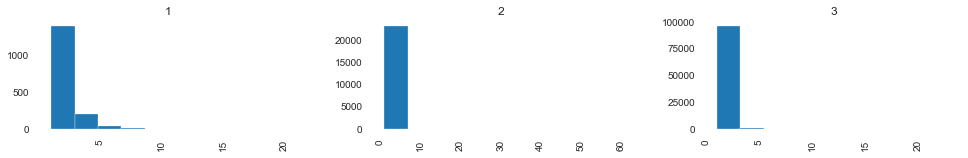

In [16]:
df['Number_of_Casualties'].hist(by=df['Accident_Severity'], layout=(1,3), figsize=(16,2))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x105cd5e10>,
      dtype=object)

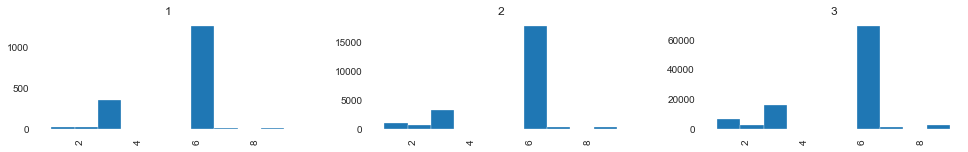

In [17]:
df['Road_Type'].hist(by=df['Accident_Severity'], layout=(1,3), figsize=(16,2))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12983bf90>,
      dtype=object)

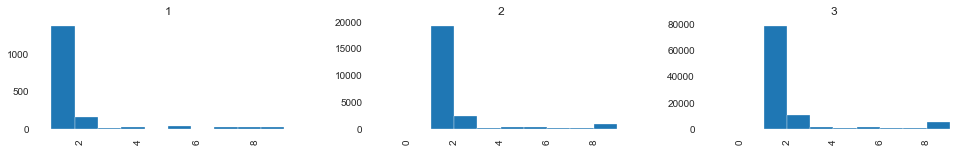

In [18]:
df['Weather_Conditions'].hist(by=df['Accident_Severity'], layout=(1,3), figsize=(16,2))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12983be90>,
      dtype=object)

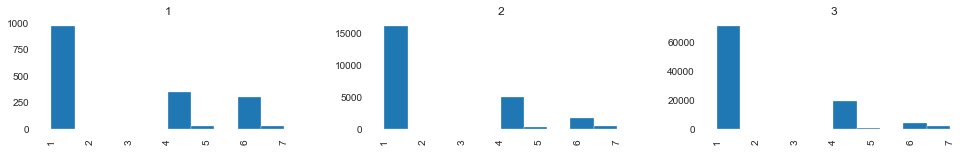

In [19]:
df['Light_Conditions'].hist(by=df['Accident_Severity'], layout=(1,3), figsize=(16,2))

Box Plot
----------

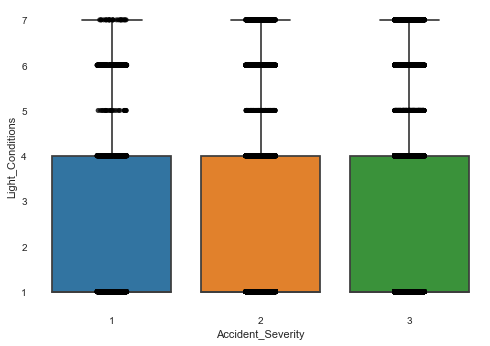

In [20]:
sns.boxplot(x='Accident_Severity',y='Light_Conditions',data=df)
sns.stripplot(x='Accident_Severity',y='Light_Conditions',data=df,
             jitter=True,
            marker='o',
              alpha=0.8,
              color='black'
             )



Heat Map and Correlation Matrix
---------------------------------

In [21]:
corr=df.corr()
corr

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Location_Easting_OSGR,1.000000,-0.431564,0.999411,-0.433856,-0.365095,0.030834,0.018583,-0.031515,0.005528,-0.390988,...,-0.044548,-0.049071,0.048341,0.016423,-0.006343,-0.079071,-0.027862,-0.022230,-0.112665,0.088430
Location_Northing_OSGR,-0.431564,1.000000,-0.440623,0.999970,0.158716,-0.036655,-0.025907,0.024963,0.000823,0.121870,...,0.022244,0.043103,-0.026840,-0.017527,0.018336,0.076040,0.023486,0.015482,0.048963,-0.026014
Longitude,0.999411,-0.440623,1.000000,-0.442823,-0.376277,0.030764,0.019025,-0.030810,0.005405,-0.399130,...,-0.043650,-0.048701,0.047038,0.016194,-0.006789,-0.079269,-0.027984,-0.022777,-0.110250,0.089313
Latitude,-0.433856,0.999970,-0.442823,1.000000,0.156838,-0.036678,-0.025857,0.024974,0.000814,0.120365,...,0.022975,0.043186,-0.026531,-0.017540,0.018318,0.075871,0.023494,0.015476,0.048407,-0.026119
Police_Force,-0.365095,0.158716,-0.376277,0.156838,1.000000,-0.050631,0.018648,0.037038,-0.002254,0.981260,...,0.000481,0.067377,-0.108863,-0.004270,-0.038965,0.108896,0.030351,0.036403,0.267873,-0.061279
Accident_Severity,0.030834,-0.036655,0.030764,-0.036678,-0.050631,1.000000,0.064981,-0.073133,0.005191,-0.053376,...,0.014741,-0.026698,0.008358,-0.050896,0.031131,-0.008397,-0.010044,-0.010715,-0.091467,0.134935
Number_of_Vehicles,0.018583,-0.025907,0.019025,-0.025857,0.018648,0.064981,1.000000,0.220921,0.000452,0.022419,...,0.014233,-0.008813,-0.060629,-0.068658,-0.033796,-0.034875,-0.004973,-0.027214,0.067565,-0.043105
Number_of_Casualties,-0.031515,0.024963,-0.030810,0.024974,0.037038,-0.073133,0.220921,1.000000,-0.003087,0.043342,...,0.002584,0.013570,-0.031807,0.022765,-0.022965,0.022941,0.012566,0.007414,0.133735,-0.098073
Day_of_Week,0.005528,0.000823,0.005405,0.000814,-0.002254,0.005191,0.000452,-0.003087,1.000000,-0.002655,...,-0.001678,-0.001171,0.003897,0.011137,0.007048,0.002550,-0.003172,-0.001685,-0.018838,0.002555
Local_Authority_(District),-0.390988,0.121870,-0.399130,0.120365,0.981260,-0.053376,0.022419,0.043342,-0.002655,1.000000,...,0.003556,0.071967,-0.118905,-0.006106,-0.043237,0.111493,0.031609,0.036126,0.284414,-0.051572


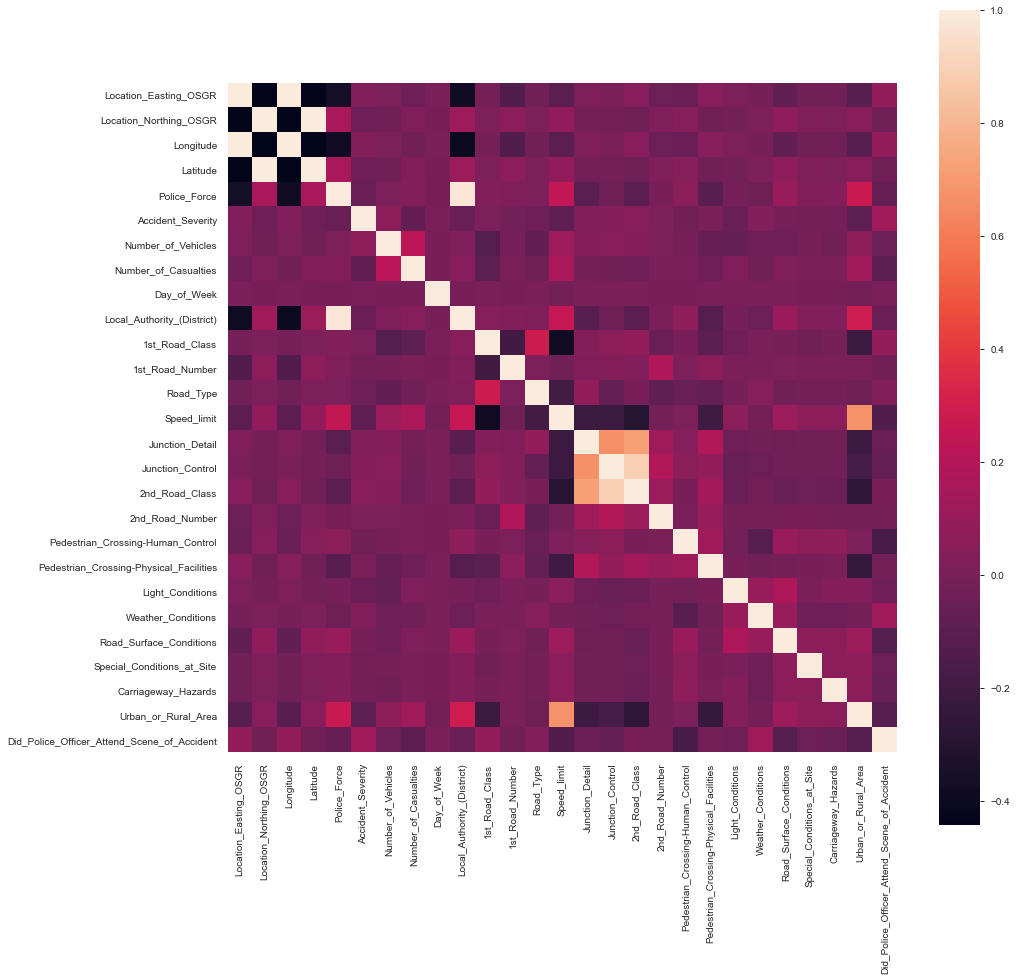

In [22]:
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,square=True)

Scatter Plot
--------------

In [23]:
numerical_data=df.select_dtypes(include=['number'])
c5=['Number_of_Casualties','Road_Type','Weather_Conditions','Light_Conditions','Urban_or_Rural_Area','Road_Surface_Conditions','Speed_limit','Day_of_Week','Accident_Severity']
numerical_data_filtered=numerical_data[c5]
numerical_data_filtered

,Number_of_Casualties,Road_Type,Weather_Conditions,Light_Conditions,Urban_or_Rural_Area,Road_Surface_Conditions,Speed_limit,Day_of_Week,Accident_Severity
0,2,3,1,4,1,1,30,2,3
1,1,6,1,4,1,1,30,2,3
2,1,6,1,4,1,1,20,2,3
3,1,3,2,4,1,2,30,2,2
4,2,6,1,4,1,2,30,2,2
...,...,...,...,...,...,...,...,...,...
122630,1,6,1,1,2,2,60,1,3
122631,1,3,1,1,1,1,70,2,3
122632,1,6,1,4,2,2,30,5,3
122633,1,6,1,1,2,4,60,2,2


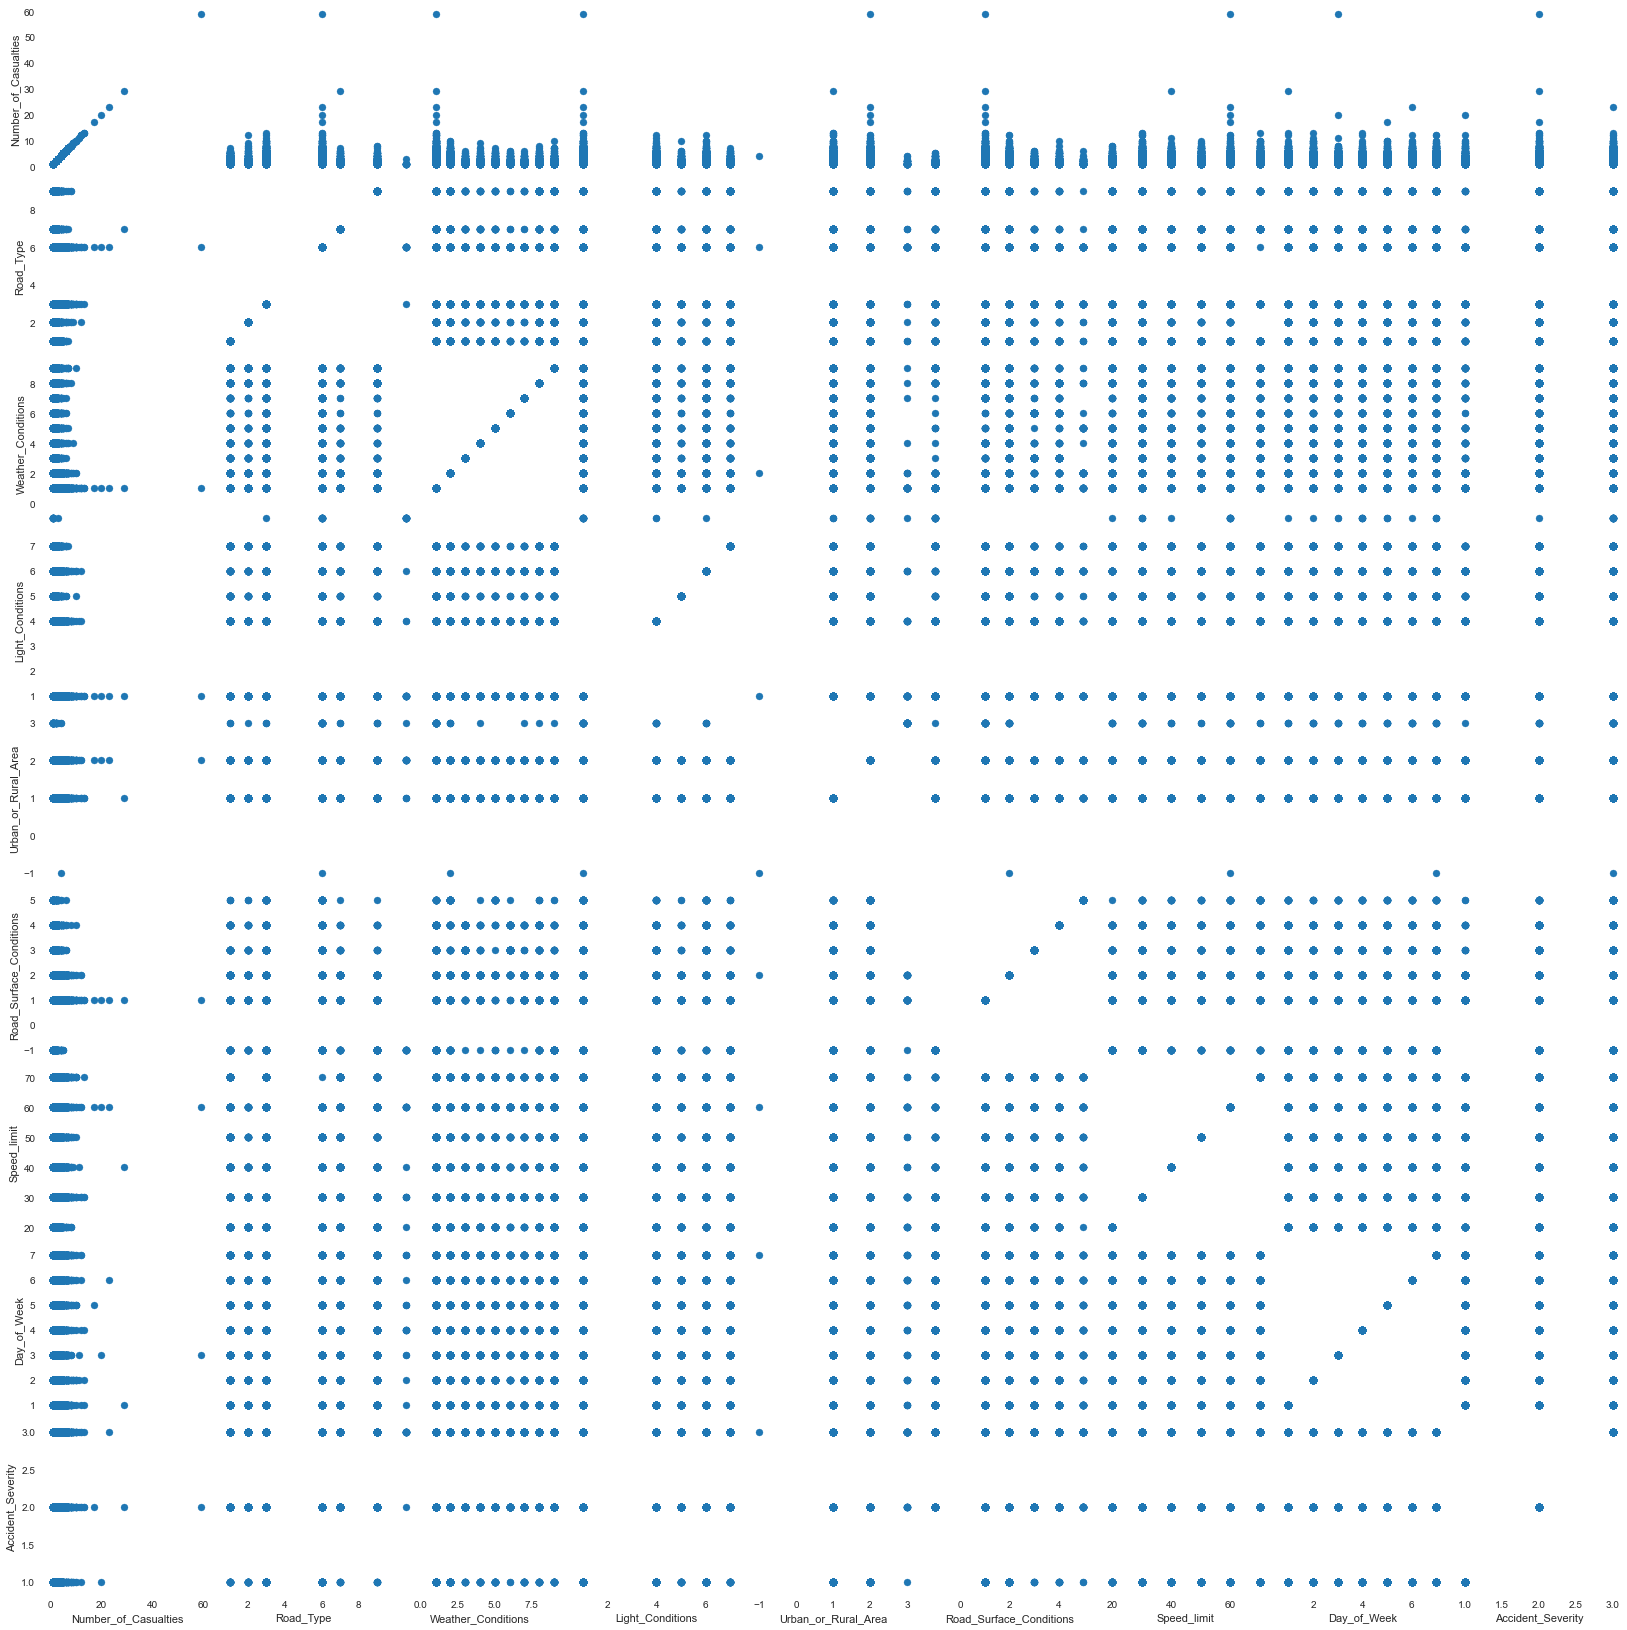

In [24]:
g=sns.PairGrid(numerical_data_filtered)
g.map(plt.scatter)

Using Pandas Profiling Library 
----------

In [25]:
# Generate the Profiling Report
profile = pp.ProfileReport(df, title="UK Accident Data-2018", html={'style': {'full_width': True}}, sort="None")
# The Notebook Widgets Interface
profile.to_file('Data/RealUKAccidentAnalysisData/dftRoadSafetyData_Accidents_2018.html')